In [1]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_ids = np.loadtxt('../data/all_files.txt', dtype=str)[:,1]

In [3]:
data_path = '/home/youssef/Desktop/data/brain-cancer/'
save_path = '../data/zero_filled_rec/10x/'
file_pathes = [data_path + file for file in file_ids]
os.makedirs(save_path, exist_ok=True)

In [4]:
# Loading sampling patterns. Notice that here we are using uncentred k-space
var_sampling_mask = np.fft.fftshift(~np.load("../data/sampling_masks/R10_512x512_poisson_center_true_radius_40_r_2.66.npy"),axes=(1,2))

In [18]:
for file_id, file_path in zip(file_ids[:1], file_pathes[:1]):
    rec = nib.load(file_path)
    rec_aux = np.swapaxes(rec.get_fdata(),0,2) 
    kspace = np.fft.fft2(rec_aux)
    indexes = np.random.choice(np.arange(var_sampling_mask.shape[0],dtype =int),
                               kspace.shape[0],replace = True)
    var_sampling_mask = (var_sampling_mask[indexes])
    kspace[var_sampling_mask] = 0
    rec_back = np.abs(np.fft.ifft2(kspace))
    rec_back = np.swapaxes(rec_back,0,2)
    img = nib.Nifti1Image(rec_back, rec.affine) 
    out_file = save_path + file_id
    nib.save(img,out_file)

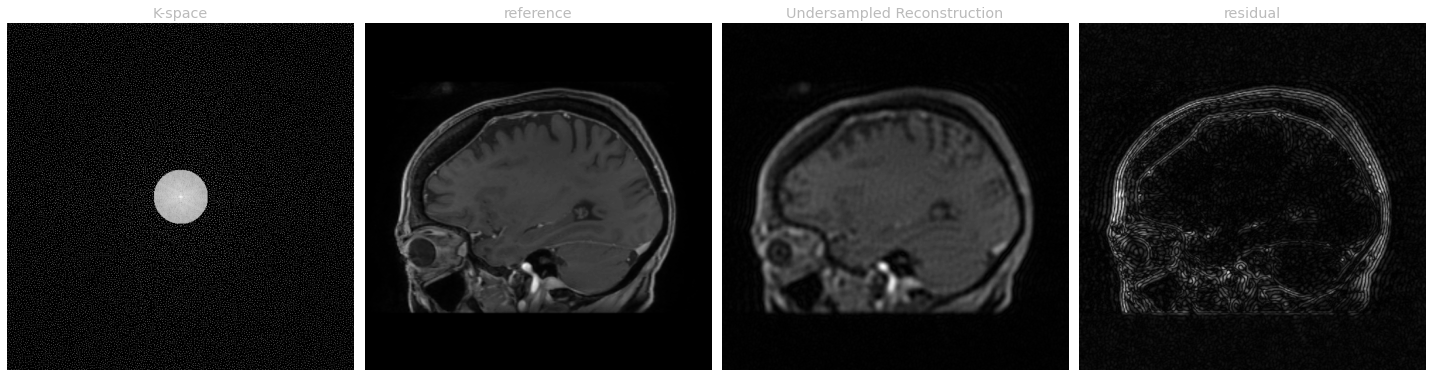

In [19]:
rec_back = np.swapaxes(rec_back,0,2)
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('K-space')
plt.axis('off')
plt.imshow(np.log(np.abs(1+np.fft.fftshift(kspace[100]))), cmap='gray')
plt.subplot(142)
plt.title('reference')
plt.axis('off')
plt.imshow(rec_aux[100], cmap='gray')
plt.subplot(143)
plt.title('Undersampled Reconstruction')
plt.axis('off')
plt.imshow(rec_back[100], cmap='gray')
plt.subplot(144)
plt.title('residual')
plt.axis('off')
plt.imshow(np.abs(rec_back[100]-rec_aux[100]), cmap='gray')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()